<h1 align = 'center'>Heart Attack Analysis and Prediction </h1>

##### Import basic libraries

In [16]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the datasets

In [17]:
df = pd.read_csv("heart.csv")

In [18]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### Initial analysis on the dataset

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "Slope", "ca", "thal", "target"]
df.columns = new_columns
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,Slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (303, 14)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Analysis Outputs
* The Data Set consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format. (Integer Or Float)
* According to first impressions, there is no missing value(NaN Value) in the data set.

#### Preparation of Exploratory Data Analysis (EDA)

##### Examining missing values

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
Slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
rest_ecg    False
thalach     False
exang       False
oldpeak     False
Slope       False
ca          False
thal        False
target      False
dtype: bool

In [26]:
isnull_numbers = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_numbers.append(x)

pd.DataFrame(isnull_numbers, index=df.columns, columns=["Total missing values"])


,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

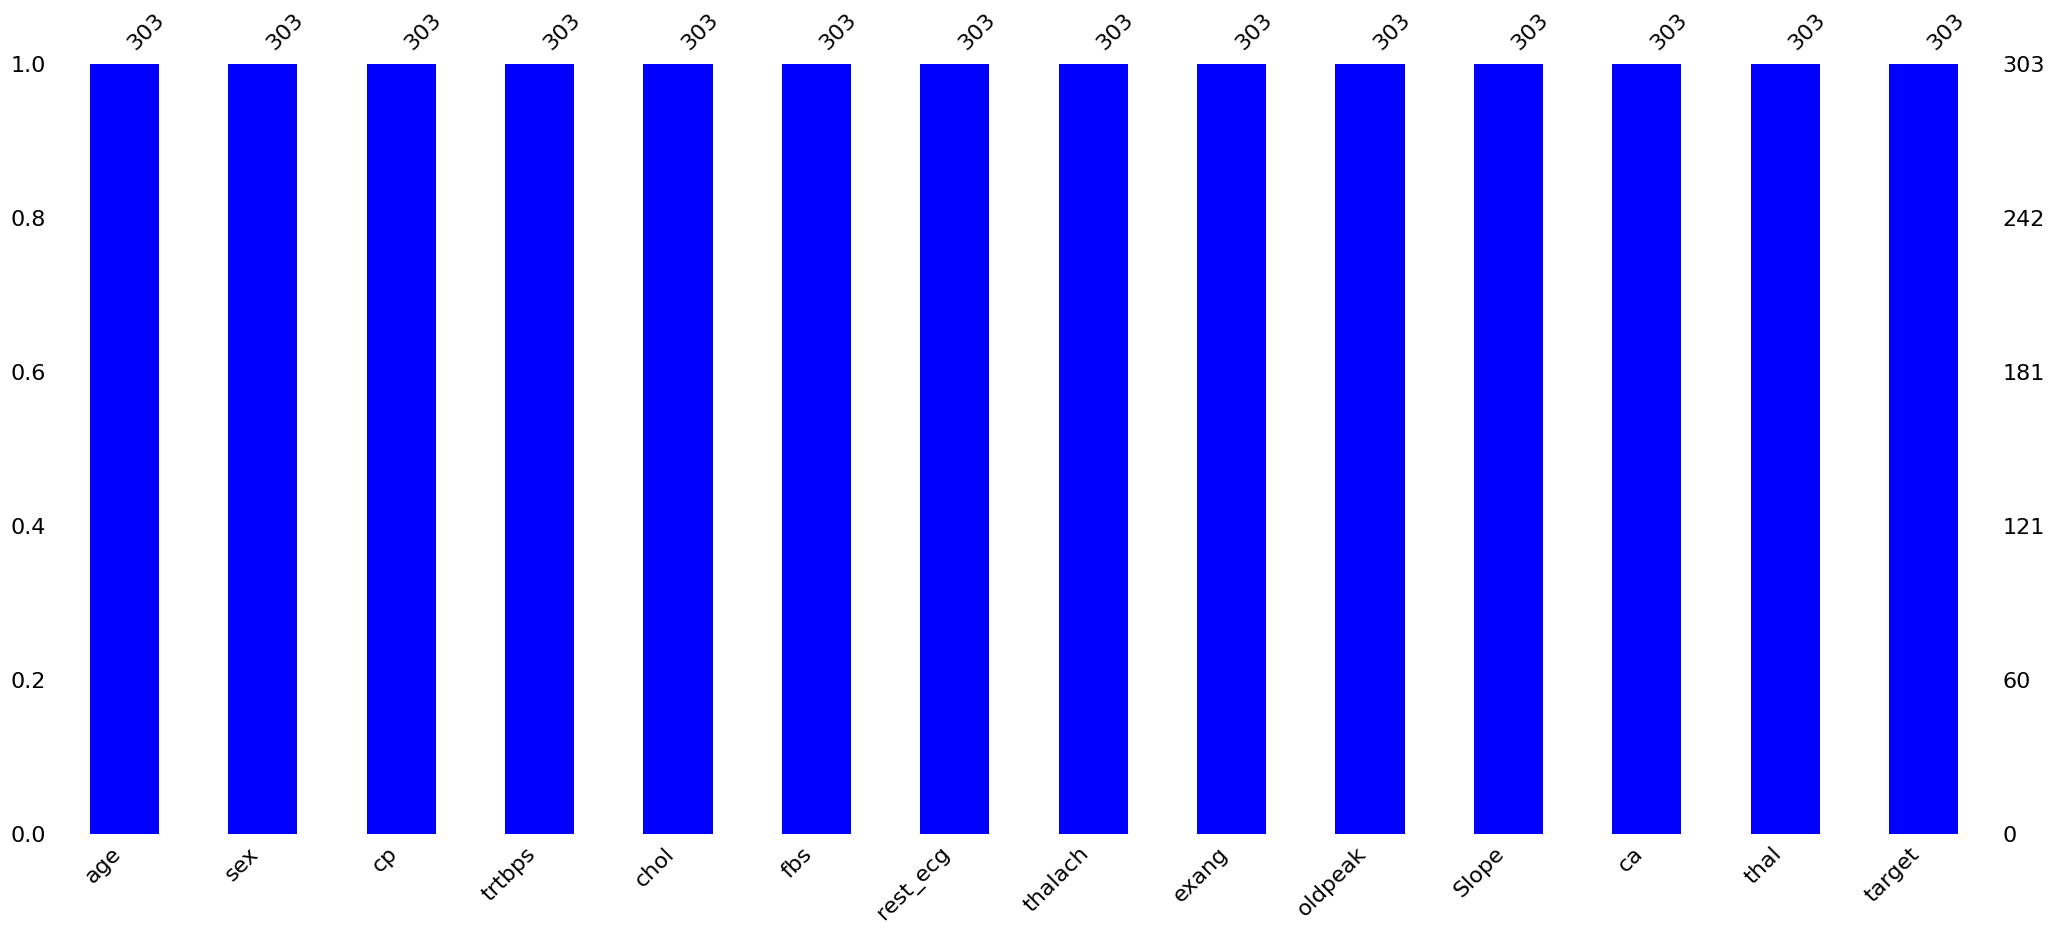

In [29]:
import missingno
missingno.bar(df, color='blue')


##### Examining unique values

In [35]:
df['cp'].nunique()

4

In [38]:
df['cp'].value_counts().count()

4

In [36]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
rest_ecg      3
thalach      91
exang         2
oldpeak      40
Slope         3
ca            5
thal          4
target        2
dtype: int64

In [42]:
unique_numbers = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_numbers.append(x)
pd.DataFrame(unique_numbers, index=df.columns, columns=["Number of unique values"])

,Number of unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


##### Seperating Variables

In [43]:
numeric_var = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categoric_var = ['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'Slope', 'ca', 'thal', 'target']

##### Examining statistics of variables

In [45]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='age', ylabel='Density'>

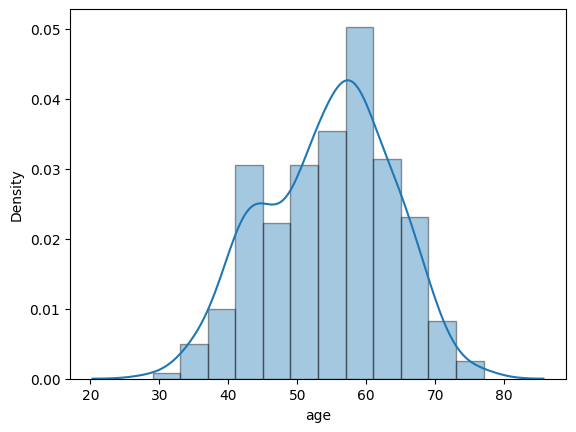

In [48]:
sns.distplot(df['age'], hist_kws=dict(linewidth = 1, edgecolor = 'k') )

<Axes: xlabel='trtbps', ylabel='Density'>

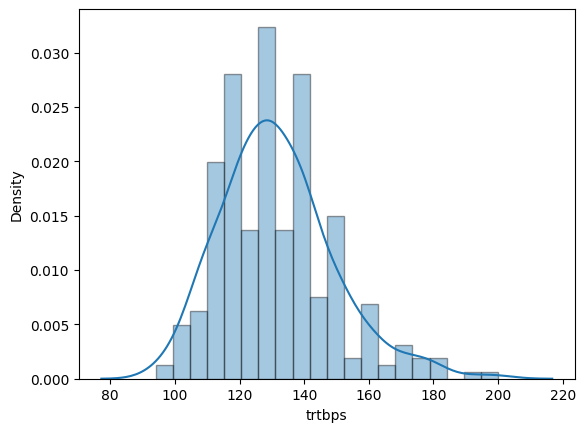

In [50]:
sns.distplot(df['trtbps'], hist_kws=dict(linewidth = 1, edgecolor = 'k'), bins=20 )

<Axes: xlabel='chol', ylabel='Density'>

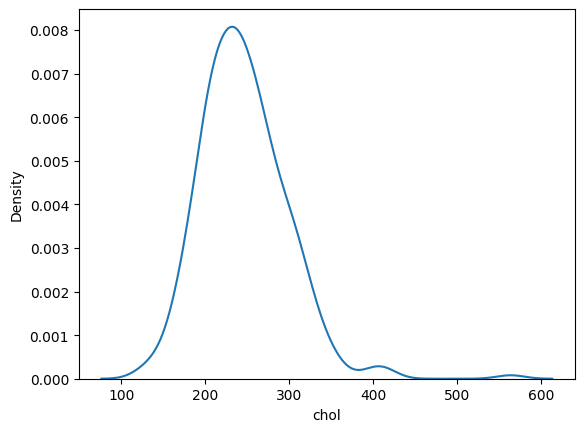

In [51]:
sns.distplot(df['chol'], hist=False)

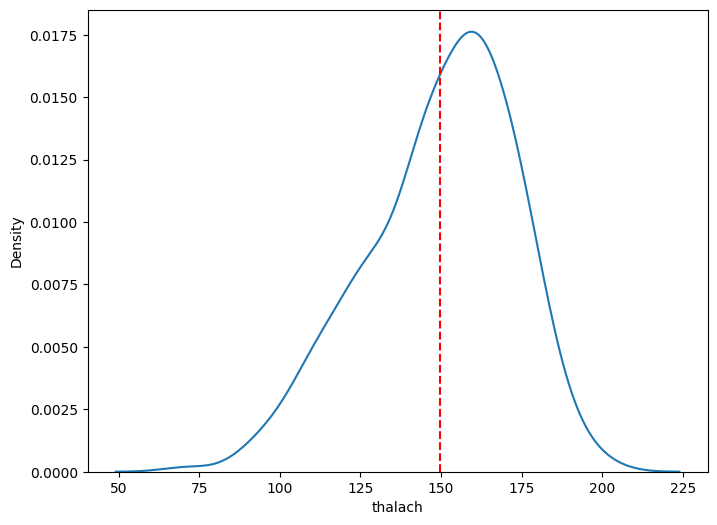

In [55]:
X,y = plt.subplots(figsize = (8,6))
sns.distplot(df['thalach'], hist=False, ax=y)
y.axvline(df['thalach'].mean(), color = "red", ls = '--')

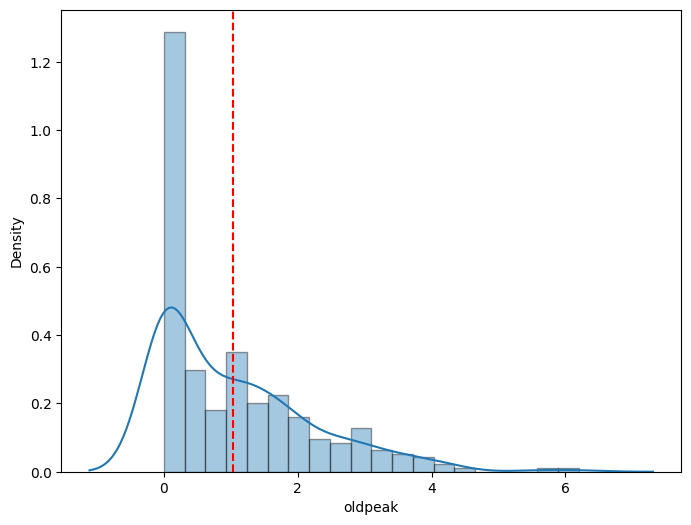

In [58]:
X,y = plt.subplots(figsize = (8,6))
sns.distplot(df['oldpeak'], hist_kws=dict(linewidth = 1, edgecolor = "black"), bins=20)
y.axvline(df['oldpeak'].mean(), color = "red", ls = '--')

#### Exploratory data analysis

##### Numeric variable - Univariate Analysis

In [59]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [62]:
numeric_axis_name = ['Age of the Patient', 'Resting Blood Pressure of the Patient', 'Cholesterol', 'MAximum Heart Rate Achieved', 'ST Depression']

In [66]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure of the Patient'),
 ('chol', 'Cholesterol'),
 ('thalach', 'MAximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

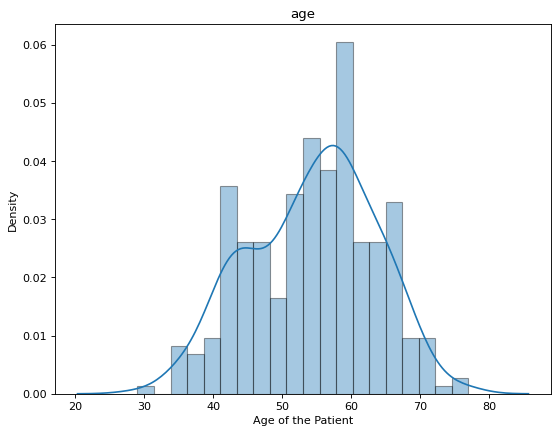

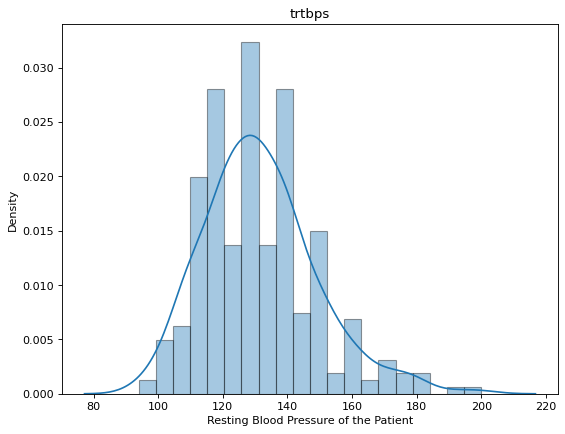

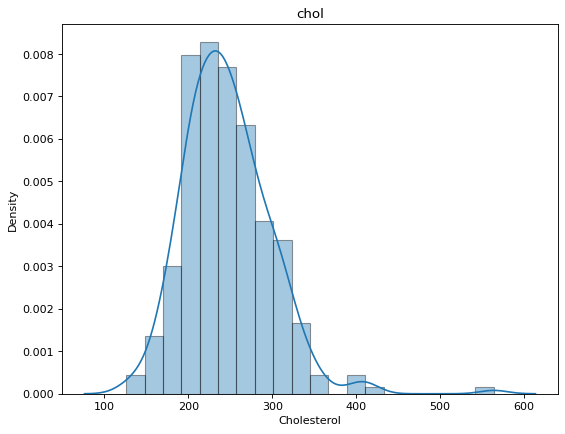

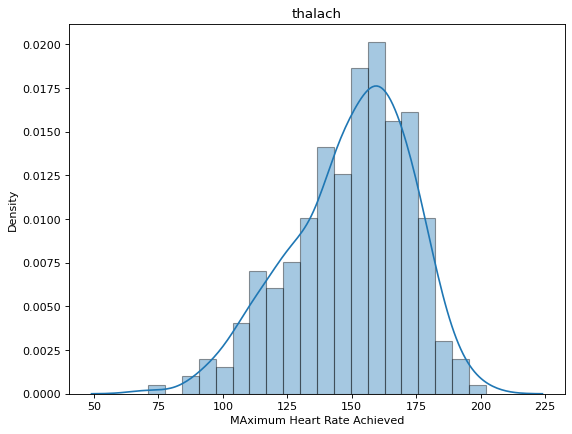

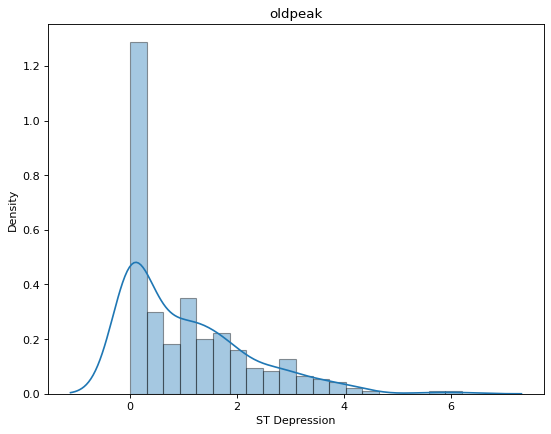

In [67]:
for i,z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize=(8,6), dpi=80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "black"), bins=20)
    plt.title(i)
    plt.xlabel(z)
    plt.ylabel("Density")

    plt.show()

##### Categorical variable (analysis with pie chart) - Univariate Analysis

In [68]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'Slope', 'ca', 'thal', 'target']

In [69]:
categoric_axis_name = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 
                       'Exercise Induced Angina', 'Slope of ST Segment', 'Number of Major Blood Vessel', 'Thal', 'Target']

In [71]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('Slope', 'Slope of ST Segment'),
 ('ca', 'Number of Major Blood Vessel'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [74]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [75]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

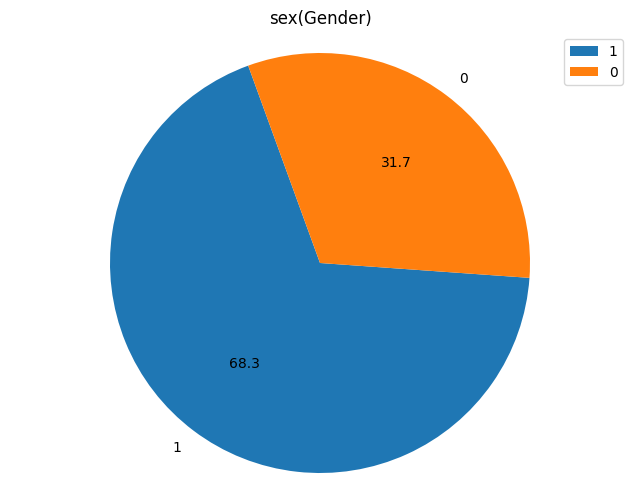

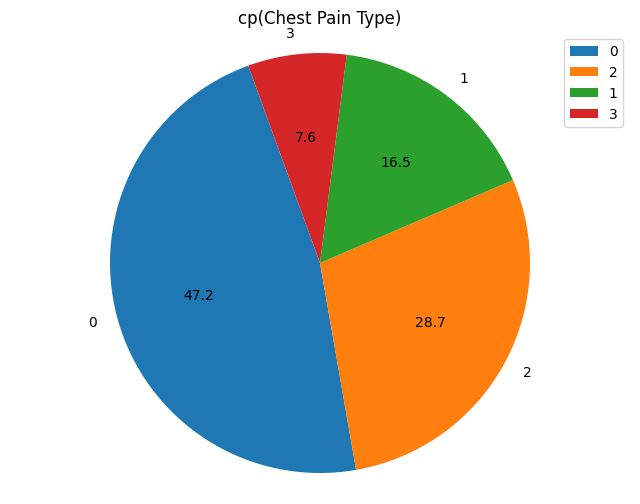

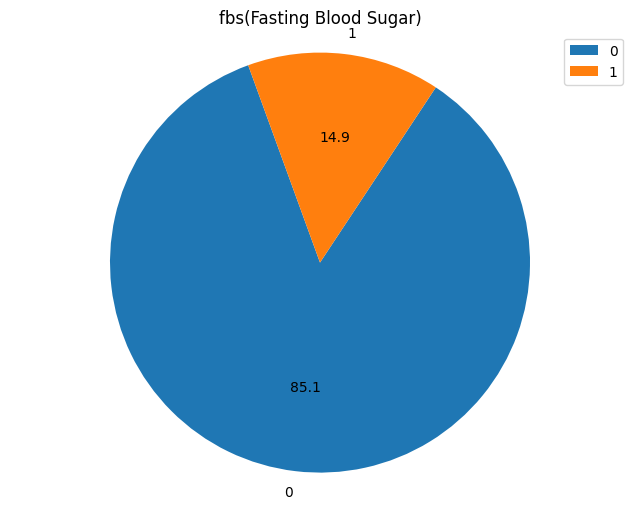

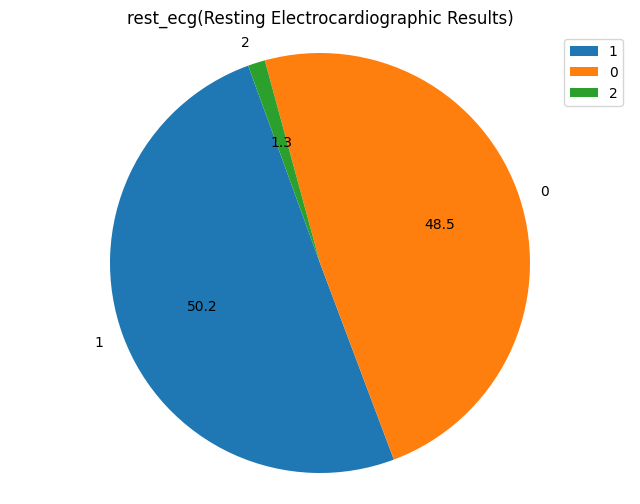

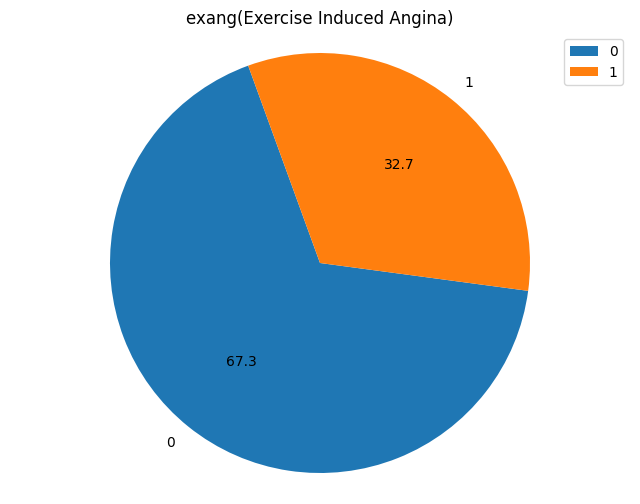

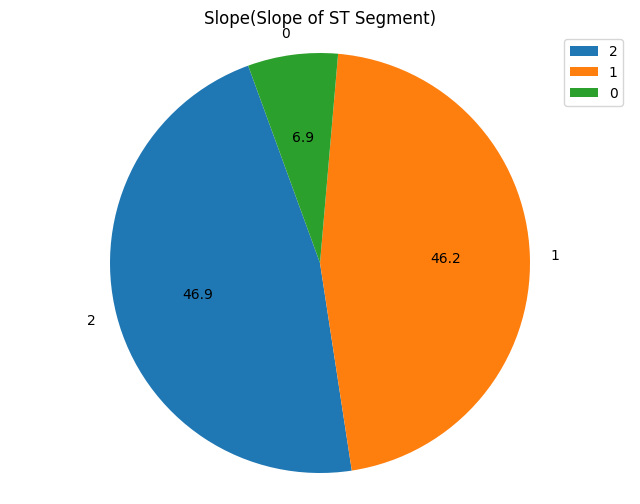

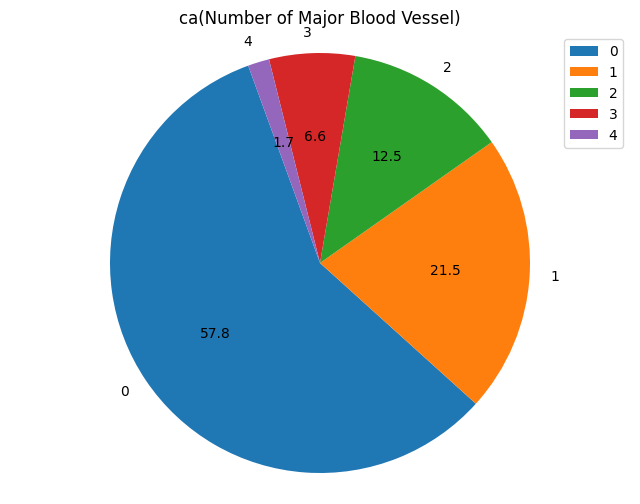

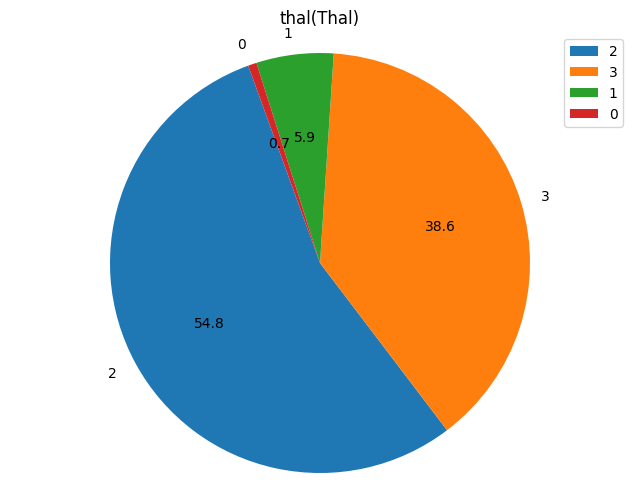

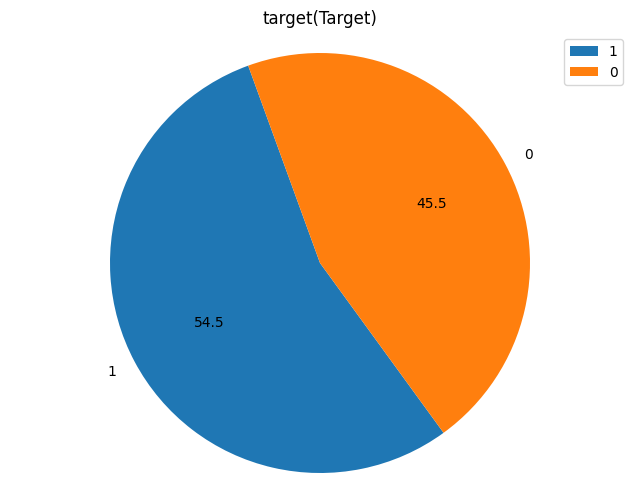

In [93]:
for i,z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize=(8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels=observation_values, autopct='%1.1f', startangle=110, labeldistance=1.1)
    ax.axis('equal')

    plt.title(i + '(' + z + ')')
    plt.legend()

    plt.show()
    